## TESTE FINAL

Esquecemos de salvar o modelo no momento que treinamos, por isso iremos rodar e treinar novamente, salvar e testar com todas o nosso dataset de teste com 3200 imagens, desta vez, que pode ser encontrada em: https://data.mendeley.com/datasets/bdd69gyhv8

In [1]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from utils import Utils

import random 
import os
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


Como é o processador?

In [2]:
!nvidia-smi

Mon Dec 12 05:38:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 497.29       Driver Version: 497.29       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   48C    P8     6W /  N/A |    541MiB /  6144MiB |     13%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Image shape: (1600, 1200, 3)


array([[[155, 158, 167],
        [155, 158, 167],
        [155, 158, 167],
        ...,
        [185, 185, 193],
        [185, 185, 193],
        [185, 185, 193]],

       [[155, 158, 167],
        [155, 158, 167],
        [155, 158, 167],
        ...,
        [185, 185, 193],
        [185, 185, 193],
        [185, 185, 193]],

       [[155, 158, 167],
        [155, 158, 167],
        [155, 158, 167],
        ...,
        [185, 185, 193],
        [185, 185, 193],
        [185, 185, 193]],

       ...,

       [[ 83,  80,  97],
        [ 83,  80,  97],
        [ 83,  80,  97],
        ...,
        [176, 179, 188],
        [176, 179, 188],
        [176, 179, 188]],

       [[ 83,  80,  97],
        [ 83,  80,  97],
        [ 83,  80,  97],
        ...,
        [176, 179, 188],
        [176, 179, 188],
        [176, 179, 188]],

       [[ 83,  80,  97],
        [ 83,  80,  97],
        [ 83,  80,  97],
        ...,
        [176, 179, 188],
        [176, 179, 188],
        [176, 179, 188]]

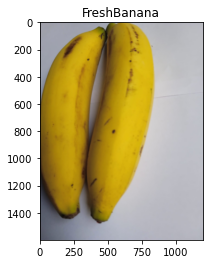

In [3]:
Utils.view_random_img(target_dir="data/test", target_class="FreshBanana")

In [4]:
#Definição do caminho dos diretórios
train_dir = 'data/train/'
val_dir = 'data/validation/'

#Normalização das imagens, dividindo os valores dos pixels (0-255) por 255
#Passamos essa informação para Parametro rescale do ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)


#Carregamento das imagens e a divisão deles batches de tamanho 32, redimencionamento das imagens 
#para facilitar o treinamento para (224,224,3) e a própria biblioteca, devido a organização dos diretórios
#também consegue categorizar nossos dados. No nosso caso teremos duas categorias: Fresca ou Podre
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='binary', #Type of problem we are working with. Cuold be categorical
                                              batch_size=32)

val_data = val_datagen.flow_from_directory(directory=val_dir,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32)

#Pegando um lote de imagens/target no nosso dataset de treinamento
images, labels = train_data.next() 
print(f'{len(images)}, {len(labels)}')

#Pegando um lote de imagens/target no nosso dataset de validação
val_images, val_labels = val_data.next() 
print(f'{len(images)}, {len(labels)}')

#Visualizando a quantidade de lotes
print(f'Tamanho do lote: {len(train_data)}')

Found 8362 images belonging to 2 classes.
Found 2381 images belonging to 2 classes.
32, 32
32, 32
Tamanho do lote: 262


In [5]:
class CNN(Model):
    
    def __init__(self):
        super().__init__()

        self.conv = tf.keras.layers.Conv2D(10,3, activation="relu", padding='same')
        self.max_pool_one = tf.keras.layers.MaxPooling2D(2,2)
        self.conv_two = tf.keras.layers.Conv2D(16,3,activation="relu",padding='same')
        self.max_pool_two = tf.keras.layers.MaxPooling2D(2,2)
        self.conv_three = tf.keras.layers.Conv2D(32,3,activation="relu", padding='same')
        self.max_pool_three = tf.keras.layers.MaxPooling2D(2,2)
        self.flat_two = tf.keras.layers.Flatten()
        self.out = tf.keras.layers.Dense(1, activation='sigmoid')
        
        
    def __call__(self, inputs, training=True):
        conv1 = self.conv(inputs)
        poll = self.max_pool_one(conv1)
        conv2 = self.conv_two(poll)
        poll2 = self.max_pool_two(conv2)
        conv3 = self.conv_three(poll2)
        poll3 = self.max_pool_three(conv3)
        flat2 = self.flat_two(poll3)

        return self.out(flat2)
    

    def analyse_result(self, origianl_data, num_sample=10) -> None:
        encoded_imgs = self.encoder(origianl_data).numpy()
        decoded_imgs = self.decoder(encoded_imgs).numpy()

        plt.figure(figsize=(20, 4))
        for i in range(num_sample):
          # display original
          ax = plt.subplot(2, num_sample, i + 1)
          plt.imshow(origianl_data[i])
          plt.title("original")
          plt.gray()
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)

        for i in range(num_sample):
          # display reconstrução
          ax = plt.subplot(2, num_sample, i + 1 + num_sample)
          plt.imshow(decoded_imgs[i])
          plt.title("reconstructed")
          plt.gray()
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)


    def plot_train_result(self, hist) -> None:
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.legend(['Training','Validation'])
        plt.title("Training And Validation Loss")
        plt.xlabel("Epochs")
        
        
    def predict_fruit(self, target_dir, class_list) -> None:
        #Pegndo exemplos aleatórios
        target_class = random.sample(class_list, 1)
        target_folder = target_dir+"/"+target_class[0]
        random_image = random.sample(os.listdir(target_folder), 1)

        #Preparando as images
        test_image = image.load_img(target_folder+"/"+random_image[0], target_size = (224,224))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = self.predict(test_image)

        print(f"Classificação real: { target_class[0] }")
        print(f"Imagem classificada como: {result[0] }")
        print(f"Valor associado: 0=Fresh, 1=Rotten")

In [6]:
cnn5 = CNN()
cnn5.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=[tf.keras.metrics.AUC()])
cnn_hist5 = cnn5.fit(train_data, epochs=5, validation_data=val_data, validation_steps=len(val_data), shuffle=True)

  ...
    to  
  ['...']
Train for 262 steps, validate for 75 steps
Epoch 1/5
262/262 [==============================] - 118s 452ms/step - loss: 0.4249 - auc: 0.8915 - val_loss: 0.3228 - val_auc: 0.9527
Epoch 2/5
262/262 [==============================] - 118s 449ms/step - loss: 0.2926 - auc: 0.9478 - val_loss: 0.2448 - val_auc: 0.9655
Epoch 3/5
262/262 [==============================] - 118s 450ms/step - loss: 0.2680 - auc: 0.9564 - val_loss: 0.2167 - val_auc: 0.9717
Epoch 4/5
262/262 [==============================] - 113s 430ms/step - loss: 0.2528 - auc: 0.9608 - val_loss: 0.2054 - val_auc: 0.9752
Epoch 5/5
262/262 [==============================] - 108s 412ms/step - loss: 0.2368 - auc: 0.9658 - val_loss: 0.2009 - val_auc: 0.9755


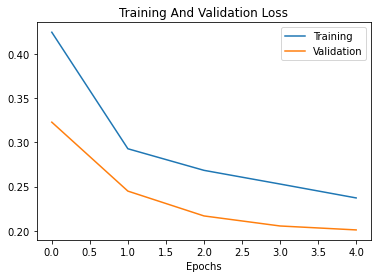

In [7]:
cnn5.plot_train_result(cnn_hist5)

In [8]:
#Realizando a validação do modelo em dados de teste
validation_train_eval = cnn5.evaluate(images, labels, verbose=0)
print(f'Perda: {validation_train_eval[0]}\nAcurácia: {validation_train_eval[1]}')

Perda: 0.6681555509567261
Acurácia: 0.8551586866378784


In [9]:
cnn5.save_weights('classification_cnn_five.h5')

### Carregando o conjunto de dados de teste

In [10]:
test_datagen=ImageDataGenerator(rescale=1/255.0)

In [11]:
test_data=test_datagen.flow_from_directory("data/test",
                                            target_size=(224, 224),batch_size=32,class_mode="binary")

Found 3200 images belonging to 16 classes.


In [12]:
class_dir = test_data.class_indices

In [13]:
#Pegando um lote de imagens/target no nosso dataset de treinamento
images, labels = test_data.next() 

In [14]:
test_eval = cnn5.evaluate(images, labels, verbose=1)

32/32 [==============================] - 0s 4ms/sample - loss: -4.1596 - auc: 0.3583


In [15]:
test_eval

[-4.159624099731445, 0.35833335]

In [16]:
TARGET_DIR = "data/test"
REAL_CLASSES = class_dir.keys()

REAL_CLASSES

dict_keys(['FreshApple', 'FreshBanana', 'FreshGrape', 'FreshGuava', 'FreshJujube', 'FreshOrange', 'FreshPomegranate', 'FreshStrawberry', 'RottenApple', 'RottenBanana', 'RottenGrape', 'RottenGuava', 'RottenJujube', 'RottenOrange', 'RottenPomegranate', 'RottenStrawberry'])

### Fazendo previsões

In [18]:
cnn5.predict_fruit(TARGET_DIR, REAL_CLASSES)

Classificação real: FreshApple
Imagem classificada como: [1.]
Valor associado: 0=Fresh, 1=Rotten


In [19]:
cnn5.predict_fruit(TARGET_DIR, REAL_CLASSES)

Classificação real: FreshPomegranate
Imagem classificada como: [1.]
Valor associado: 0=Fresh, 1=Rotten


In [20]:
cnn5.predict_fruit(TARGET_DIR, REAL_CLASSES)

Classificação real: FreshBanana
Imagem classificada como: [0.]
Valor associado: 0=Fresh, 1=Rotten


In [21]:
cnn5.predict_fruit(TARGET_DIR, REAL_CLASSES)

Classificação real: RottenStrawberry
Imagem classificada como: [1.]
Valor associado: 0=Fresh, 1=Rotten
